# Mengimport Library yang Dibutuhkan

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Membaca File CSV


In [49]:
df = pd.read_csv('heart.csv')

# Gambaran Data


#### Pernyataan Masalah

Penyakit kardiovaskular (CVDs) adalah penyebab kematian nomor 1 secara global, mengambil sekitar 17,9 juta jiwa setiap tahun, yang menyumbang 31% dari semua kematian di seluruh dunia. Empat dari 5CVD kematian disebabkan oleh serangan jantung dan stroke, dan sepertiga dari kematian ini terjadi sebelum waktunya pada orang di bawah usia 70 tahun. Gagal jantung adalah kejadian umum yang disebabkan oleh CVD dan kumpulan data ini berisi 11 fitur yang dapat digunakan untuk memprediksi kemungkinan penyakit jantung.

Orang dengan penyakit kardiovaskular atau yang berada pada risiko kardiovaskular tinggi (karena adanya satu atau lebih faktor risiko seperti hipertensi, diabetes, hiperlipidemia atau penyakit yang sudah ada) memerlukan deteksi dan manajemen dini di mana model pembelajaran mesin dapat sangat membantu.

### Target

Membaca dan memahami tentang jumlah masalah jantung bedasarkan data

In [50]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [52]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


### Informasi kolom dan data
1. Age: Umur pasien (dalam tahun)
2. Sex: Jenis kelamin pasien (M = Laki-laki | F = Perempuan)
3. ChestPainType: Jenis nyeri dada (TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic)
4. RestingBP: Tekanan darah saat beristirahat (mm Hg)
5. Cholesterol: Serum Kolesterol (mm/dl)
6. FastingBS: Tekanan darah puasa (1: Jika FastingBS > 120 mg/dl, 0: otherwise)
7. RestingECG: Hasil elektrokardiogram istirahat (Normal: Normal, ST: memiliki kelainan gelombang ST-T (inversi gelombang T dan/atau elevasi atau depresi ST > 0,05 mV), LVH: menunjukkan kemungkinan atau pasti hipertrofi ventrikel kiri menurut kriteria Estes)
8. MaxHR: Detak Jantung Maksimum [Numeric value]
9. ExerciseAngina: exercise-induced angina / angina akibat olahraga [Y: Yes, N: No]
10. Oldpeak: oldpeak = ST [Numeric value measured in depression]
11. ST_Slope: kemiringan segmen ST latihan puncak [Up: upsloping, Flat: flat, Down: downsloping]
12. HeartDisease: output class [1: heart disease, 0: Normal]

### Poin Penting
* ada data yang tidak valid karena memiliki nilai minimum 0, yaitu di attribute RestingBP dan Cholesterol
* ada data yang tidak valid karena memiliki nilai negatif, yaitu di attribute OldPeak

# Data Cleaning

In [53]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [54]:
df_1 = df[df["RestingBP"] == 0]
print("Data RestingBP yang tidak valid =", df_1["RestingBP"].count())
df_2 = df[df["Cholesterol"] == 0]
print("Data Cholesterol yang tidak valid =", df_2["Cholesterol"].count())
df_3 = df[df["Oldpeak"] < 0]
print("Data Oldpeak yang tidak valid =", df_3["Oldpeak"].count())

print("Persentase Data RestingBP yang tidak valid =", df_1["RestingBP"].count()*100/918, "%")
print("Persentase Data Cholesterol yang tidak valid =", df_2["Cholesterol"].count()*100/918, "%")
print("Persentase Data Oldpeak yang tidak valid =", df_3["Oldpeak"].count()*100/918, "%")

Data RestingBP yang tidak valid = 1
Data Cholesterol yang tidak valid = 172
Data Oldpeak yang tidak valid = 13
Persentase Data RestingBP yang tidak valid = 0.10893246187363835 %
Persentase Data Cholesterol yang tidak valid = 18.736383442265794 %
Persentase Data Oldpeak yang tidak valid = 1.4161220043572984 %


In [55]:
df_4 = df[(df["Oldpeak"] < 0) & (df["Cholesterol"] == 0)]
print(df_4["Oldpeak"].count())

12


* Karena ada 12 data yang data Cholesterol nya juga tidak valid dari 13 data dimana oldpeak bernilai negatif, maka bila kita menghapus semua data yang tidak valid jumlah nya tidak akan lebih dari 20% total data
* Karena itu data yang tidak valid akan dihilangkan

In [56]:
#Mengganti nilai 0 menjadi null value
df[["RestingBP", "Cholesterol"]] = \
    df[["RestingBP", "Cholesterol"]].replace(0, np.NaN)
df.isnull().sum()

Age                 0
Sex                 0
ChestPainType       0
RestingBP           1
Cholesterol       172
FastingBS           0
RestingECG          0
MaxHR               0
ExerciseAngina      0
Oldpeak             0
ST_Slope            0
HeartDisease        0
dtype: int64

In [57]:
#Menghilangkan null value
df = df.dropna()
df.shape

(746, 12)

In [58]:
#Mencari indeks yang Oldpeak nya masih negatif
df_3 = df[df["Oldpeak"] < 0]
df_3

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
512,35,M,NAP,123.0,161.0,0,ST,153,N,-0.1,Up,0


In [59]:
#Menghilangkan value Oldpeak negatif
df.drop([512], axis = 0, inplace = True)
df.shape

(745, 12)

In [60]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,745.0,52.906040,9.489625,28.0,46.0,54.0,59.0,77.0
RestingBP,745.0,133.036242,17.290451,92.0,120.0,130.0,140.0,200.0
Cholesterol,745.0,244.747651,59.113689,85.0,208.0,237.0,275.0,603.0
FastingBS,745.0,0.167785,0.373927,0.0,0.0,0.0,0.0,1.0
MaxHR,745.0,140.209396,24.536108,69.0,122.0,140.0,160.0,202.0
Oldpeak,745.0,0.902953,1.072953,0.0,0.0,0.5,1.5,6.2
HeartDisease,745.0,0.477852,0.499845,0.0,0.0,0.0,1.0,1.0


In [61]:
df = df.reset_index()
df

,index,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,0,40,M,ATA,140.0,289.0,0,Normal,172,N,0.0,Up,0
1,1,49,F,NAP,160.0,180.0,0,Normal,156,N,1.0,Flat,1
2,2,37,M,ATA,130.0,283.0,0,ST,98,N,0.0,Up,0
3,3,48,F,ASY,138.0,214.0,0,Normal,108,Y,1.5,Flat,1
4,4,54,M,NAP,150.0,195.0,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
740,913,45,M,TA,110.0,264.0,0,Normal,132,N,1.2,Flat,1
741,914,68,M,ASY,144.0,193.0,1,Normal,141,N,3.4,Flat,1
742,915,57,M,ASY,130.0,131.0,0,Normal,115,Y,1.2,Flat,1
743,916,57,F,ATA,130.0,236.0,0,LVH,174,N,0.0,Flat,1


### Poin Penting
* data ini diambil dari populasi orang dewasa dengan minimal umur 28
* rata-rata kolesterol ada di angka 244 yang termasuk kategori kolesterol tinggi
* data MaxHR berada di kisaran 69-202 (masih berada pada kisaran normal)

# 3. Data Exploration

In [62]:
df.groupby("HeartDisease").mean()

,index,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
HeartDisease,,,,,,,
0,444.164524,50.210797,130.182519,238.969152,0.110540,149.048843,0.395116
1,509.623596,55.851124,136.154494,251.061798,0.230337,130.550562,1.457865


* Orang yang menderita penyakit jantung rata-rata sedikit lebih tua dari orang normal
* Orang yang menderita penyakit jantung cenderung memiliki FastingBS dan nilai Oldpeak yang signifikan lebih tinggi dari orang normal, dapat menjadi indikasi bahwa nilai FastingBS dan Oldpeak yang tinggi berpengaruh ke penyakit jantung
* MaxHR orang yang menderita penyakit jantung cenderung lebih rendah dari orang normal

In [63]:
# Hitung jumlah laki-Laki dan perempuan
count_sex = pd.Series([])

for i in range(len(df)):
    if(df['Sex'][i] == "M"):
        count_sex[i] = "Laki-Laki"
    elif(df['Sex'][i] == "F"):
        count_sex[i] = "Perempuan"
        
df.insert(2,"Jenis kelamin", count_sex)
df['Jenis kelamin'].value_counts()

<ipython-input-63-3b7dd5d099ce>:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  count_sex = pd.Series([])


Laki-Laki    563
Perempuan    182
Name: Jenis kelamin, dtype: int64

In [64]:
cholesterol_status = pd.Series([])

for i in range(len(df)):
    if df["Cholesterol"][i] < 200:
        cholesterol_status[i] = "Normal"
    elif df["Cholesterol"][i] >= 200 and df["Cholesterol"][i] < 240: 
        cholesterol_status[i] = "Ambang Batas Tinggi"
    elif df["Cholesterol"][i] >= 240:
        cholesterol_status[i] = "Tinggi"
        
df.insert(3, "Cholesterol Status", cholesterol_status)
df['Cholesterol Status'].value_counts()

<ipython-input-64-6557a42f0f91>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  cholesterol_status = pd.Series([])


Tinggi                 363
Ambang Batas Tinggi    237
Normal                 145
Name: Cholesterol Status, dtype: int64

In [65]:
#menghitung detak jantung maximal per menit yang normal berdasarkan umur
count_NormalHB = pd.Series([])

for i in range(len(df)):
    
    if(df['Age'][i] > 20 and df['Age'][i] <= 30):
        if(df['MaxHR'][i] >= 140 and df['MaxHR'][i] <= 170):
            count_NormalHB[i] = "Normal"
        else:
            count_NormalHB[i] = "Tidak Normal"
    if(df['Age'][i] > 30 and df['Age'][i] <= 40):
        if(df['MaxHR'][i] >= 100 and df['MaxHR'][i] <= 170):
            count_NormalHB[i] = "Normal"
        else:
            count_NormalHB[i] = "Tidak Normal"
        
    if(df['Age'][i] > 40 and df['Age'][i] <= 50):
        if(df['MaxHR'][i] >= 90 and df['MaxHR'][i] <= 153):
            count_NormalHB[i] = "Normal"
        else:
            count_NormalHB[i] = "Tidak Normal"
        
    if(df['Age'][i] > 50 and df['Age'][i] <= 60):
        if(df['MaxHR'][i] >= 80 and df['MaxHR'][i] <= 136):
            count_NormalHB[i] = "Normal"
        else:
            count_NormalHB[i] = "Tidak Normal"
        
    if(df['Age'][i] > 60 and df['Age'][i] <= 70):
        if(df['MaxHR'][i] >= 75 and df['MaxHR'][i] <= 128):
            count_NormalHB[i] = "Normal"
        else:
            count_NormalHB[i] = "Tidak Normal"
    
    if(df['Age'][i] > 70):
        if(df['MaxHR'][i] >= 60 and df['MaxHR'][i] <= 100):
            count_NormalHB[i] = "Normal"
        else:
            count_NormalHB[i] = "Tidak Normal"
        
df.insert(2,"Maximum", count_NormalHB)
df['Maximum'].value_counts()

<ipython-input-65-1445320166eb>:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  count_NormalHB = pd.Series([])


Tidak Normal    379
Normal          366
Name: Maximum, dtype: int64

In [66]:
count_heartD = pd.Series([])

for i in range(len(df)):
    
    if (df['HeartDisease'][i] == 1):
        count_heartD[i] = "Punya Penyakit Jantung"
    if (df['HeartDisease'][i] == 0):
        count_heartD[i] = "Tidak Punya Penyakit Jantung"   
        
df.insert(2,"Banyaknya Yang Punya Penyakit Jantung", count_heartD)
df['Banyaknya Yang Punya Penyakit Jantung'].value_counts()

<ipython-input-66-e785ad9f1855>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  count_heartD = pd.Series([])


Tidak Punya Penyakit Jantung    389
Punya Penyakit Jantung          356
Name: Banyaknya Yang Punya Penyakit Jantung, dtype: int64

# 4. Data Distribution

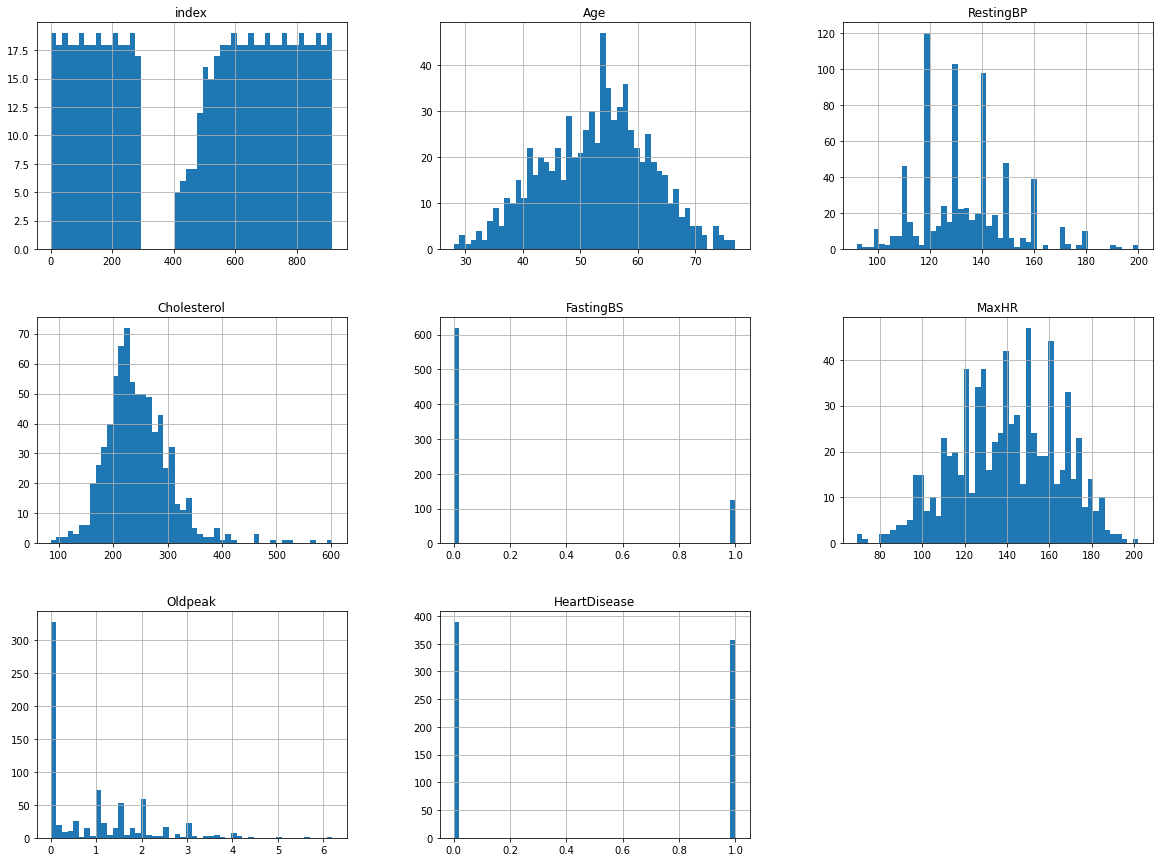

In [33]:
df.hist(bins=50, figsize=(20, 15))
plt.show()

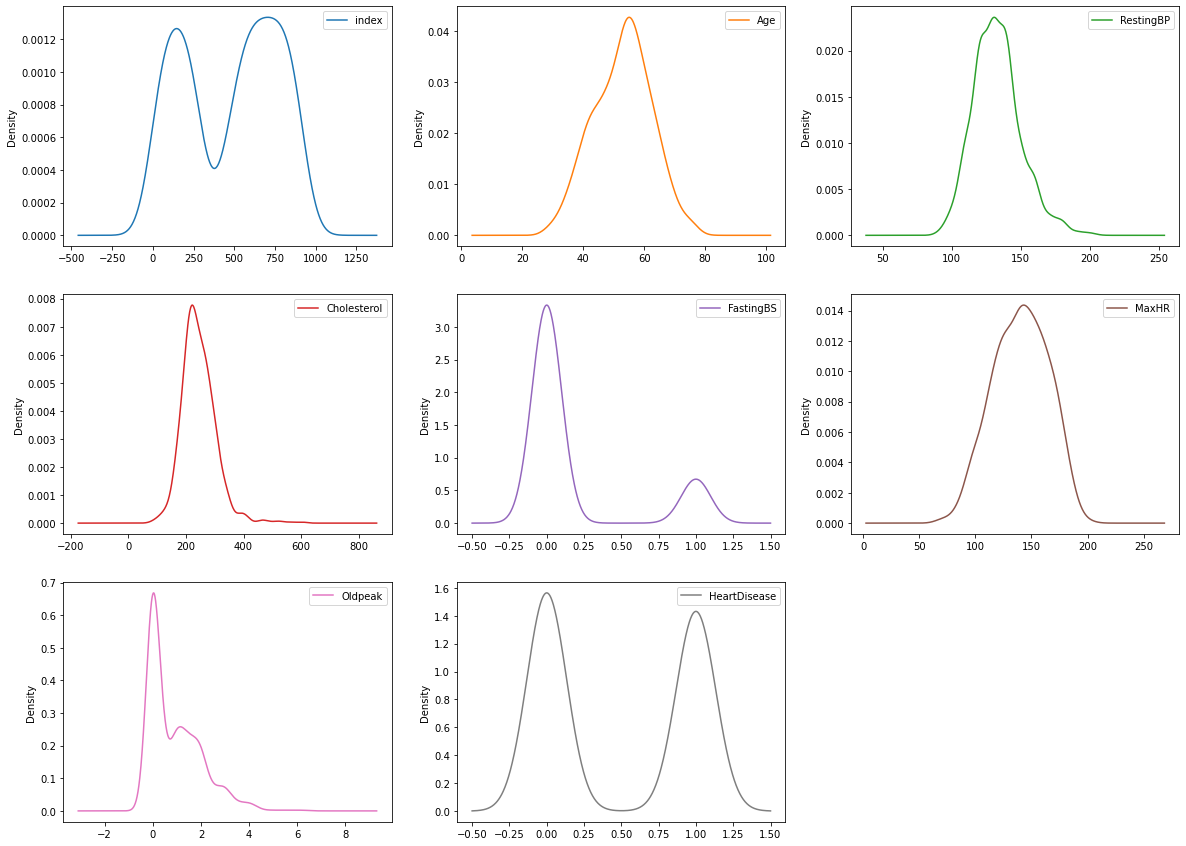

In [34]:
df.plot(kind='density', subplots=True, layout=(3,3), figsize=(20, 15), sharex=False)
plt.show()

<AxesSubplot:title={'center':'Perbandingan Gender'}, ylabel='Sex'>

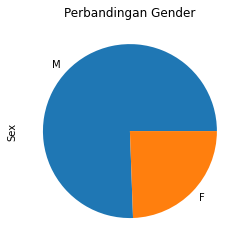

In [35]:
df["Sex"].value_counts().plot(kind="pie", title="Perbandingan Gender")

<AxesSubplot:>

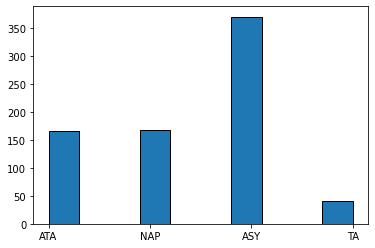

In [36]:
df["ChestPainType"].hist(grid=False, edgecolor='black')

<AxesSubplot:>

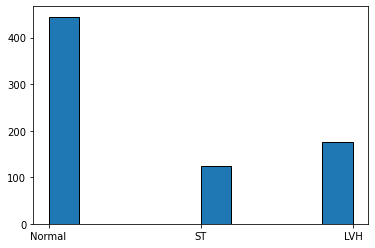

In [37]:
df["RestingECG"].hist(grid=False, edgecolor='black')

<AxesSubplot:>

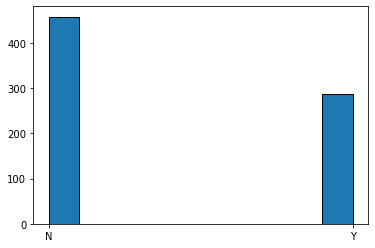

In [38]:
df["ExerciseAngina"].hist(grid=False, edgecolor='black')

<AxesSubplot:>

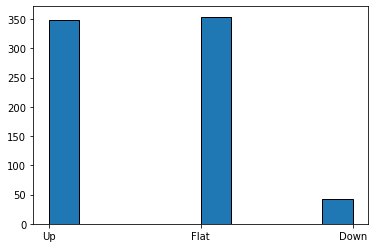

In [39]:
df["ST_Slope"].hist(grid=False, edgecolor='black')

# 5. Outliers

index              AxesSubplot(0.125,0.657941;0.227941x0.222059)
Age             AxesSubplot(0.398529,0.657941;0.227941x0.222059)
RestingBP       AxesSubplot(0.672059,0.657941;0.227941x0.222059)
Cholesterol        AxesSubplot(0.125,0.391471;0.227941x0.222059)
FastingBS       AxesSubplot(0.398529,0.391471;0.227941x0.222059)
MaxHR           AxesSubplot(0.672059,0.391471;0.227941x0.222059)
Oldpeak               AxesSubplot(0.125,0.125;0.227941x0.222059)
HeartDisease       AxesSubplot(0.398529,0.125;0.227941x0.222059)
dtype: object

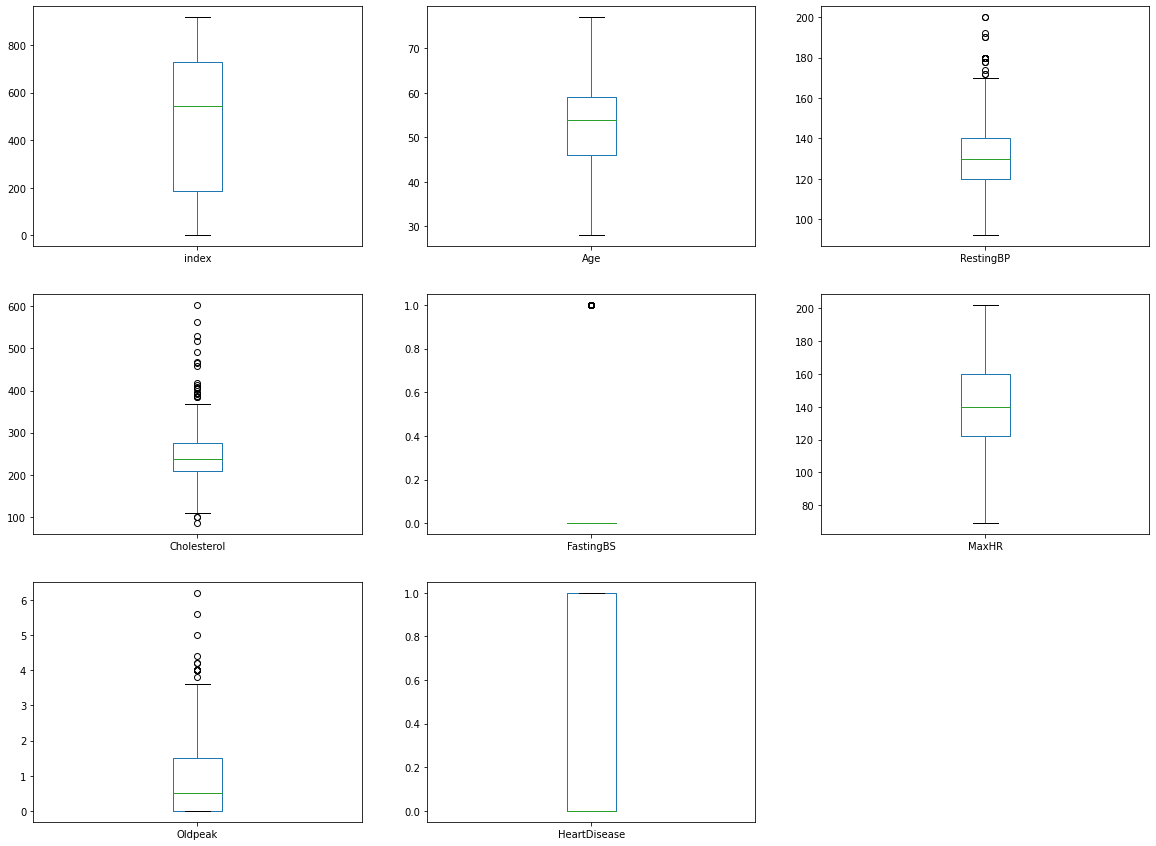

In [40]:
df.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(20,15))

# 6. Correlation

In [45]:
corr = df.corr(method='pearson')
corr

,index,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
index,1.000000,0.339182,0.005836,-0.010960,0.112424,0.154943,0.199881,0.112698
Age,0.339182,1.000000,0.259074,0.055390,0.240810,-0.381774,0.284489,0.297092
RestingBP,0.005836,0.259074,1.000000,0.094986,0.173478,-0.125419,0.198008,0.172642
Cholesterol,-0.010960,0.055390,0.094986,1.000000,0.053239,-0.018895,0.056824,0.102251
FastingBS,0.112424,0.240810,0.173478,0.053239,1.000000,-0.102428,0.055045,0.160138
MaxHR,0.154943,-0.381774,-0.125419,-0.018895,-0.102428,1.000000,-0.259078,-0.376843
Oldpeak,0.199881,0.284489,0.198008,0.056824,0.055045,-0.259078,1.000000,0.495091
HeartDisease,0.112698,0.297092,0.172642,0.102251,0.160138,-0.376843,0.495091,1.000000


<AxesSubplot:>

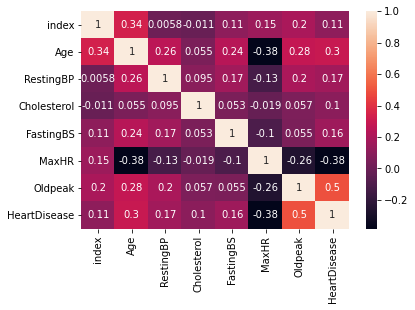

In [46]:
sns.heatmap(corr, annot = True)

* Oldpeak memiliki korelasi terkuat dengan HeartDisease, karena itu orang dengan nilai Oldpeak tinggi harus waspada terhadap penyakit jantung
* MaxHR memiliki korelasi negatif terhadap HeartDisease, yang berarti semakin rendah MaxHR seseorang maka semakin besar kemungkinan terkena HeartDisease